In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting-Up Random seed
random_seed = 123
np.random.seed(random_seed)

In [5]:
# Load the dataset
df = pd.read_csv("aami2_rr.csv")
print(f"Number of rows: {df.shape[0]} and Number of Columns: {df.shape[1]}")
print(df.head())

Number of rows: 88788 and Number of Columns: 153
         X1        X2        X3        X4        X5        X6        X7  \
0  1.293171  1.360678  0.860100  0.051110 -0.206077 -0.125416 -0.087846   
1  1.232076  1.075826  0.405717 -0.114467 -0.212261 -0.108854 -0.079889   
2  1.233930  1.057698  0.408393 -0.078846 -0.191882 -0.118111 -0.106731   
3  1.217173  1.085536  0.275376 -0.178754 -0.128293 -0.068922 -0.077071   
4  1.339295  1.272418  0.491927 -0.146486 -0.151202 -0.090853 -0.101470   

         X8        X9       X10  ...      X144      X145      X146      X147  \
0 -0.107388 -0.103146 -0.083170  ... -0.203861 -0.308555 -0.232641  0.021874   
1 -0.099462 -0.094461 -0.076627  ... -0.265898 -0.250088 -0.060972  0.166844   
2 -0.100036 -0.078761 -0.085809  ... -0.170485 -0.205794 -0.243929 -0.051335   
3 -0.072036 -0.066262 -0.079008  ... -0.252421 -0.269652 -0.089793  0.194089   
4 -0.088016 -0.085047 -0.097395  ... -0.282350 -0.150704 -0.036550  0.083712   

       X148      X1

In [6]:
# Unique Values
print(df['annotations'].value_counts())

# Creating binary label: 0: Normal Heart Beat, 1: Abnormal/Anything except normal
df['label'] = df['annotations'].apply(lambda x: 0 if x == 'N' else 1)

# Label Distribution
label_count  = df['label'].value_counts().sort_index()
print(f"Normal (0):   {label_count[0]:,} samples ({label_count[0]/len(df)*100:.2f}%)")
print(f"Abnormal (1): {label_count[1]:,} samples ({label_count[1]/len(df)*100:.2f}%)")

# Contamination rate (For isolation forest)
contamination_rate = label_count[1] / len(df)
print(f"Contamination ({contamination_rate*100:.2f}%)")

annotations
N    79322
V     6984
S     2467
Q       15
Name: count, dtype: int64
Normal (0):   79,322 samples (89.34%)
Abnormal (1): 9,466 samples (10.66%)
Contamination (10.66%)


The contamination parameter informs Isolation Forest's threshold for classifying anomalies based on the known proportion of abnormal samples in the training data.

In [14]:
# Identify feature columns 
feature_columns = [col for col in df.columns if col.startswith('X')]
n_features = len(feature_columns)
print(f"Number of features: {n_features}")

# check for missing values
missing = df[feature_columns].isnull().sum().sum()
print(f"Number of missing values: {missing}")

# Range of features (Important for knowing if we need scaling)
print(f"Minimum: {df[feature_columns].min().min():.4f}")
print(f"Maximum: {df[feature_columns].max().max():.4f}")

print("Variance per feature (first 10):")
print(df[feature_columns[:10]].var())

Number of features: 150
Number of missing values: 0
Minimum: -3.0868
Maximum: 3.6288
Variance per feature (first 10):
X1     0.577947
X2     0.569482
X3     0.471101
X4     0.425609
X5     0.345077
X6     0.244616
X7     0.170806
X8     0.131675
X9     0.112974
X10    0.099204
dtype: float64


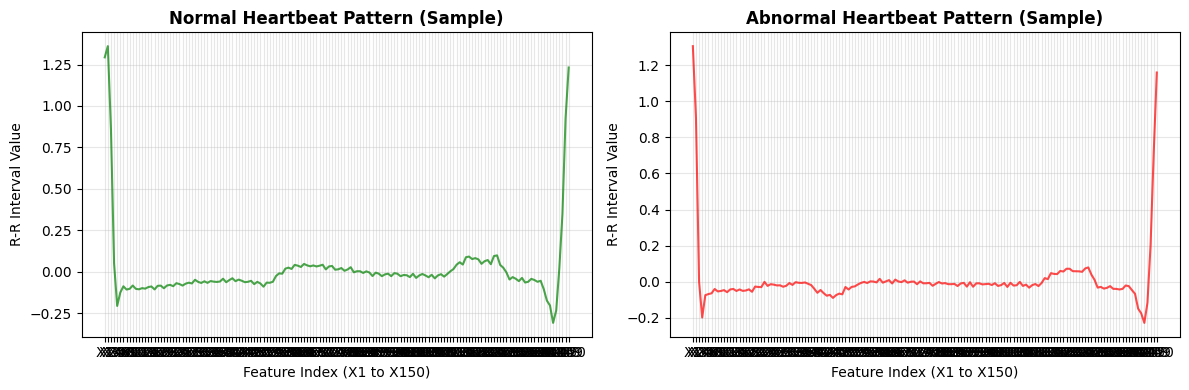

✓ Visualization complete!


In [ ]:

plt.figure(figsize=(12, 4))

# Plot 1: Sample normal heartbeat
plt.subplot(1, 2, 1)
normal_sample = df[df['label']==0][feature_columns].iloc[0]
plt.plot(normal_sample, color='green', linewidth=1.5, alpha=0.7)
plt.title('Normal Heartbeat Pattern (Sample)', fontweight='bold')
plt.xlabel('Feature Index (X1 to X150)')
plt.ylabel('R-R Interval Value')
plt.grid(True, alpha=0.3)

# Plot 2: Sample abnormal heartbeat  
plt.subplot(1, 2, 2)
abnormal_sample = df[df['label']==1][feature_columns].iloc[0]
plt.plot(abnormal_sample, color='red', linewidth=1.5, alpha=0.7)
plt.title('Abnormal Heartbeat Pattern (Sample)', fontweight='bold')
plt.xlabel('Feature Index (X1 to X150)')
plt.ylabel('R-R Interval Value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [21]:
# Let's create a summary
print("="*70)
print("SUMMARY - DATA EXPLORATION")
print("="*70)
print(f"\n✓ Total Samples: {len(df):,}")
print(f"✓ Features (R-R intervals): {n_features}")
print(f"✓ Normal heartbeats: {label_count[0]:,} ({label_count[0]/len(df)*100:.1f}%)")
print(f"✓ Abnormal heartbeats: {label_count[1]:,} ({label_count[1]/len(df)*100:.1f}%)")
print(f"✓ Contamination rate: {contamination_rate:.4f}")
print(f"✓ Feature ranges: {df[feature_columns].min().min():.2f} to {df[feature_columns].max().max():.2f}")
print(f"✓ Missing values: {missing}")
print(f"\n⚠ Key insight: Features have different variances → Need standardization!")
print(f"✓ Visual patterns differ between normal and abnormal")
print("\n" + "="*70)

SUMMARY - DATA EXPLORATION

✓ Total Samples: 88,788
✓ Features (R-R intervals): 150
✓ Normal heartbeats: 79,322 (89.3%)
✓ Abnormal heartbeats: 9,466 (10.7%)
✓ Contamination rate: 0.1066
✓ Feature ranges: -3.09 to 3.63
✓ Missing values: 0

⚠ Key insight: Features have different variances → Need standardization!
✓ Visual patterns differ between normal and abnormal

